In [75]:
import numpy as np
import pandas as pd
import read_model_ID_toy as model
import calculate_cleavage_rate_toy_(6state) as clv
import matplotlib.pylab as plt
import sys
sys.path.append('../')
sys.path.append('../../code_Boyle')
import Nucleaseq_data_processing as processing
reload(model)
reload(clv)
import seaborn as sns
sns.set_style('ticks')
current_colors = sns.color_palette()

### load experimental data

In [59]:
filename = 'WT_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'
path_to_data = '../../data_nucleaseq_Finkelsteinlab/targetE/'

xdata, ydata, yerr = processing.prepare_multiprocessing_combined('1',filename,'../../Data_Boyle/',path_to_data,True)

kclv = []
kon = []
i = 1
while i < 20+1:
    for a in range(len(xdata)):
        if len(xdata[a])==1 and xdata[a][0]==i:
            kclv.append(ydata[a][0][0])
            kon.append(np.log10(ydata[a][1][0]))
            i = i + 1
    
kclv.append(ydata[0][0][0])
kclv = np.array(kclv)
kon.append(np.log10(ydata[0][1][0]))
kon = np.array(kon)



k_double = np.zeros([20,20])
k_double_on = np.zeros([20,20])

for a in range(len(xdata)):
    if len(xdata[a])==2:
        i = xdata[a][0]
        j = xdata[a][1]
        k_double[j-1,i-1] = (ydata[a][0][0])
        if len(ydata[a][1]) > 0:
            k_double_on[j-1,i-1] = np.log10(ydata[a][1][0])
        else:
            k_double_on[j-1,i-1] = np.nan
        
k_double_df = pd.DataFrame(k_double, index=range(1, 21), columns=range(1, 21))
k_double_on_df = pd.DataFrame(k_double_on, index=range(1, 21), columns=range(1, 21))

### construct artificial parameter set and show landscape

[5.89486256 4.70996609 5.81566466 6.49267008 5.81241418 6.84276404
 6.85077757 5.08902106 6.44475201 6.42685904 6.28009167 5.21009571
 5.93948234 5.90449134 5.64699604 5.02426782 3.7975338  3.16828704
 3.82103648 4.18686182]
1.8276464889499997
3.7963778165300006
1.7705877625835293


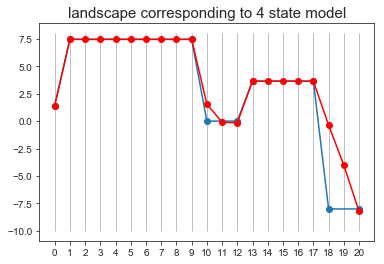

In [76]:
filename = 'fit_17_5_2019_sim_5.txt'
path = '../../fits_Stijn/17_5_2019/'
data = pd.read_table(path+filename,index_col=False)
chi = data.loc[:,'Potential']
T = data.loc[:,'Temperature']
final_par = data.loc[np.argmin(chi),'Parameter 1':'Parameter 25']
final_par_np = np.array(final_par.values)
model_id = 'four_state_model_clv'

parameters = np.zeros(26)
parameters[0] = 1.4
parameters[1] = 8.
parameters[2] = 6.045
parameters[3] = 3.637
parameters[4:24] = final_par_np[2:22]
print parameters[4:24]
#parameters[20:24] = 3.
#parameters[20:24] = 2.
parameters[-2] = final_par_np[-2]-1
parameters[-1] = final_par_np[-1]
print parameters[-2]
print parameters[-1]

epsilon, forward_rates = model.unpack_parameters(parameters,model_id)
epsilontemp = np.cumsum(np.append(1.4, -epsilon[1:5]))
epsilontemp = np.append(epsilontemp[0],np.append([epsilontemp[0] + epsilon[5],epsilontemp[0] + epsilon[5]],epsilontemp[1:]))
epsilontemp = np.append(epsilontemp[0:5],np.append([epsilontemp[4] + epsilon[6],epsilontemp[4] + epsilon[6]],epsilontemp[5:]))

plt.plot([0,1,9,10,12,13,17,18,20],epsilontemp,marker='o')
plt.vlines(range(0,21),-10,8,linewidth=0.5,color='grey')
plt.xticks(range(0,21),range(0,21));
plt.title('landscape corresponding to 4 state model',fontsize=15)

landscape = np.zeros(21)
landscape[0] = 1.389248 #PAM Boyle, minus PAM Boyle :)
landscape[1:10] = np.ones(9)*7.44538973 #median height
landscape[10:13] = [1.547533, -0.105180, -0.153215] #well defined dip, from Boyle
landscape[13:18] = np.ones(5)*3.6374928 #median height
landscape[18:21] = [-0.361180,-4.009278,-8.223548] #well defined second dip, from Boyle

plt.plot(range(0,21),landscape,marker='o',color='red')

print forward_rates[1]*np.exp(-epsilon[6])

In [134]:
print clv.calc_cleavage_rate_fast(parameters,model_id,[])

print clv.calc_cleavage_rate_fast(parameters,model_id,[11])

0.13193821880946704
0.0034374283300466855


Text(34,0.5,'mismatch 2')

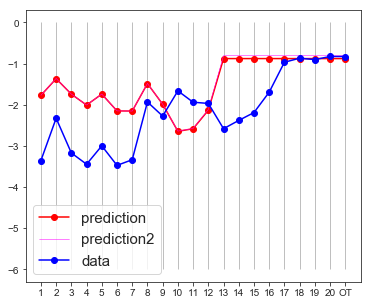

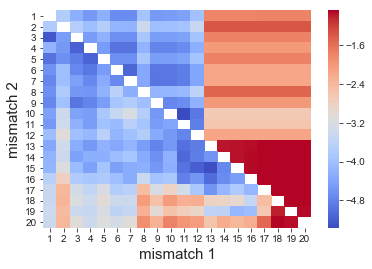

In [77]:
k = np.zeros(21)
for i in range(1,21):
    mismatch_positions = [i]
    k[i-1] = np.log10(clv.calc_cleavage_rate_fast(parameters,model_id,mismatch_positions))
k[-1] = np.log10(clv.calc_cleavage_rate_fast(parameters,model_id,[]))

k2 = np.zeros(21)
for i in range(1,21):
    mismatch_positions = [i]
    k2[i-1] = np.log10(clv.calc_cleavage_rate_slow(parameters,model_id,mismatch_positions))
k2[-1] = np.log10(clv.calc_cleavage_rate_slow(parameters,model_id,[]))

    
plt.figure(figsize=[6,5])
plt.plot(range(1,22),k,marker='o',color='red')
plt.plot(range(1,22),k2,color='magenta',linewidth=0.5)
plt.xticks(range(1,22),range(1,21)+['OT']);
plt.vlines(range(1,22),-6,0,linewidth=0.5,color='grey')
plt.plot(range(1,22),kclv,marker='o',color='b')
plt.legend(['prediction','prediction2','data'],fontsize=15)

k_double = np.zeros([20,20])
for i in range(1,20):
    for j in range(i+1,21):
        mismatch_positions = [i,j]
        k_double[i-1][j-1] = np.log10(clv.calc_cleavage_rate_fast(parameters,model_id,mismatch_positions))
        
k_df = pd.DataFrame(k_double, index=range(1, 21), columns=range(1, 21))
k_df = k_df + k_double_df
for i in range(1,21):
    k_df[i].loc[i]=np.nan
    
plt.figure()
sns.heatmap(k_df, cmap='coolwarm', cbar=True)
plt.xlabel('mismatch 1', fontsize=15)
plt.ylabel('mismatch 2', fontsize=15)

In [119]:
chi = 0.0

perfectClv = np.float(len(ydata[0]))
singleClv = 0.0
doubleClv = 0.0
for i in range(len(xdata)):
    if len(xdata[i])==1:
        singleClv += len(ydata[i])
    if len(xdata[i])==2:
        doubleClv += len(ydata[i])

chi_weights = [1/perfectClv,1/singleClv,1/doubleClv]

for i in range(len(xdata)):
    mismatch = xdata[i]
    chi += clv.calc_chi_squared(parameters,mismatch,ydata[i][0],yerr[i][0],chi_weights,False,model_id)
    
print chi

895.3777525950195


Text(34,0.5,'mismatch 2')

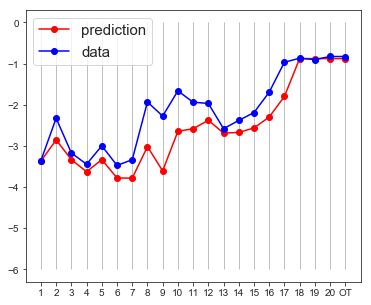

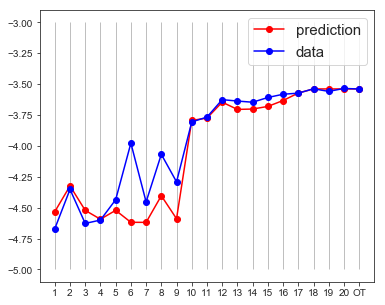

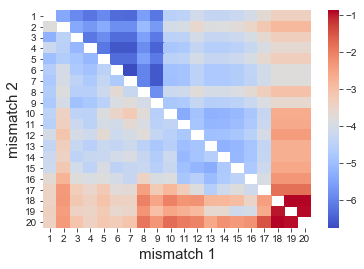

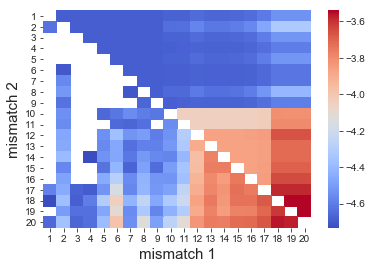

In [74]:
reload(clv)
model_id = 'four_state_model_clv+four_state_model_on'
parameters_com = np.append(np.append([1.4],parameters[0:-2]),np.append([-2.4],parameters[-2:]))

k = np.zeros(21)
k2 = np.zeros(21)
for i in range(1,21):
    mismatch_positions = [i]
    k[i-1],k2[i-1] = np.log10(clv.calc_clv_on(parameters_com,model_id,mismatch_positions))
k[-1],k2[-1] = np.log10(clv.calc_clv_on(parameters_com,model_id,[]))
    
plt.figure(figsize=[6,5])
plt.plot(range(1,22),k,marker='o',color='red')
plt.xticks(range(1,22),range(1,21)+['OT']);
plt.vlines(range(1,22),-6,0,linewidth=0.5,color='grey')
plt.plot(range(1,22),kclv,marker='o',color='b')
plt.legend(['prediction','data'],fontsize=15)

plt.figure(figsize=[6,5])
plt.plot(range(1,22),k2,marker='o',color='red')
plt.xticks(range(1,22),range(1,21)+['OT']);
plt.vlines(range(1,22),-5,-3,linewidth=0.5,color='grey')
plt.plot(range(1,22),kon,marker='o',color='b')
plt.legend(['prediction','data'],fontsize=15)

k_double = np.zeros([20,20])
k_double2 = np.zeros([20,20])
for i in range(1,20):
    for j in range(i+1,21):
        mismatch_positions = [i,j]
        k_double[i-1][j-1],k_double2[i-1][j-1] = np.log10(clv.calc_clv_on(parameters_com,model_id,mismatch_positions))
        
k_df = pd.DataFrame(k_double, index=range(1, 21), columns=range(1, 21))
k_on_df = pd.DataFrame(k_double2, index=range(1, 21), columns=range(1, 21))

k_df = k_df + k_double_df
k_on_df = k_on_df + k_double_on_df
for i in range(1,21):
    k_df[i].loc[i]=np.nan
    k_on_df[i].loc[i]=np.nan
    
plt.figure()
sns.heatmap(k_df, cmap='coolwarm', cbar=True)
plt.xlabel('mismatch 1', fontsize=15)
plt.ylabel('mismatch 2', fontsize=15)

plt.figure()
sns.heatmap(k_on_df, cmap='coolwarm', cbar=True)
plt.xlabel('mismatch 1', fontsize=15)
plt.ylabel('mismatch 2', fontsize=15)

In [ ]:
print calc_cleavage_rate(parameters,model_id,[11])
print calc_cleavage_rate2(parameters,model_id,[11])

In [26]:
def calc_cleavage_rate(parameters,model_id,mismatch_positions):
    
    epsilon,rates = model.unpack_parameters(parameters,model_id)
    if type(mismatch_positions)==type([]):
            mismatch_positions = np.array(mismatch_positions)

    new_epsilon = epsilon.copy()        
    energies_OT = -1*new_epsilon[0:5]
    energies_OT[0] *= -1 #PAM, I, 0, R, 0
    barrier1 = new_epsilon[5]
    barrier2 = new_epsilon[6]

    for i in mismatch_positions:
        if i < 10: #mismatch in the first barrier
            energies_OT[1] += new_epsilon[6+i]
            barrier1 += new_epsilon[6+i]
        elif i < 13: #mismatch in first flat part
            energies_OT[2] += new_epsilon[6+i]
        elif i < 18: #mismatch in second barrier
            energies_OT[3] += new_epsilon[6+i]
            barrier2 += new_epsilon[6+i]
        elif i <21: #mismatch in last flat part
            energies_OT[4] += new_epsilon[6+i]

    rates_OT = rates.copy()
    rates_OT[1] *= np.exp(-barrier1)
    rates_OT[2] *= np.exp(-energies_OT[2])
    rates_OT[3] *= np.exp(-barrier2)
    rates_OT[4] *= np.exp(-energies_OT[4])

    backward_OT = np.zeros(len(rates_OT))
    backward_OT[0] = 0.0 #no rate backward from solution
    backward_OT[1] = rates_OT[0]*np.exp(energies_OT[0]) #backward rate from PAM
    backward_OT[2] = rates_OT[1]*np.exp(energies_OT[1]) #backward rate over first barrier
    backward_OT[3] = rates_OT[2]*np.exp(energies_OT[2]) #backward rate over flat part
    backward_OT[4] = rates_OT[3]*np.exp(energies_OT[3]) #backward rate over second barrier
    backward_OT[5] = rates_OT[4]*np.exp(energies_OT[4]) #backward rate over flat part
    
    #combined rates
    forward_combined = np.zeros(4)
    forward_combined[0] = rates_OT[0]
    forward_combined[1] = (rates_OT[1]*rates_OT[2])/(rates_OT[1] + backward_OT[2] +rates_OT[2])
    forward_combined[2] = (rates_OT[3]*rates_OT[4])/(rates_OT[3] + backward_OT[4] +rates_OT[4])
    forward_combined[3] = rates_OT[5]

    backward_combined = np.zeros(4)
    backward_combined[0] = backward_OT[0]
    backward_combined[1] = backward_OT[1]
    backward_combined[2] = (backward_OT[3]*backward_OT[2])/(backward_OT[3] + rates_OT[2] + backward_OT[2])
    backward_combined[3] = (backward_OT[5]*backward_OT[4])/(backward_OT[5] + rates_OT[4] + backward_OT[4])
    
    diagonal1 = -(forward_combined + backward_combined)
    diagonal2 = backward_combined[1:]
    diagonal3 = forward_combined[:-1]
    # rate_matrix = np.zeros((len(forward_rates), len(forward_rates)))  # Build the matrix

    rate_matrix = np.diag(diagonal1, k=0) + np.diag(diagonal2, k=1) + np.diag(diagonal3, k=-1)

    M = -1 * rate_matrix
    Minv = np.linalg.inv(M)
    vec = np.ones(len(Minv))
    everything_unbound = np.array([1.0] + [0.0] * (3))
    MFPT = vec.dot(Minv.dot(everything_unbound))
    k = 1/MFPT
    
    return k

In [63]:
def calc_cleavage_rate2(parameters,model_id,mismatch_positions):
    
    epsilon,rates = model.unpack_parameters(parameters,model_id)
    if type(mismatch_positions)==type([]):
            mismatch_positions = np.array(mismatch_positions)

    new_epsilon = epsilon.copy()        
    energies_OT = -1*new_epsilon[0:5]
    energies_OT[0] *= -1 #PAM, I, 0, R, 0
    barrier1 = new_epsilon[5]
    barrier2 = new_epsilon[6]

    rates_OT = rates.copy()
    rates_OT[1] *= np.exp(-barrier1)
    rates_OT[2] *= np.exp(-energies_OT[2])
    rates_OT[3] *= np.exp(-barrier2)
    rates_OT[4] *= np.exp(-energies_OT[4])
    
    for i in mismatch_positions:
        if i < 10: #mismatch in the first barrier
            rates_OT[1] *= np.exp(-new_epsilon[6+i])
        elif i < 13: #mismatch in first flat part
            rates_OT[2] *= np.exp(-new_epsilon[6+i])
        elif i < 18: #mismatch in second barrier
            rates_OT[3] *= np.exp(-new_epsilon[6+i])
            barrier2 += new_epsilon[6+i]
        elif i <21: #mismatch in last flat part
            rates_OT[4] *= np.exp(-new_epsilon[6+i])

    backward_OT = np.zeros(len(rates_OT))
    backward_OT[0] = 0.0 #no rate backward from solution
    backward_OT[1] = rates_OT[0]*np.exp(energies_OT[0]) #backward rate from PAM
    backward_OT[2] = rates_OT[1]*np.exp(energies_OT[1]) #backward rate over first barrier
    backward_OT[3] = rates_OT[2]*np.exp(energies_OT[2]) #backward rate over flat part
    backward_OT[4] = rates_OT[3]*np.exp(energies_OT[3]) #backward rate over second barrier
    backward_OT[5] = rates_OT[4]*np.exp(energies_OT[4]) #backward rate over flat part

    #combined rates
    forward_combined = np.zeros(4)
    forward_combined[0] = rates_OT[0]
    forward_combined[1] = (rates_OT[1]*rates_OT[2])/(rates_OT[1] + backward_OT[2] +rates_OT[2])
    forward_combined[2] = (rates_OT[3]*rates_OT[4])/(rates_OT[3] + backward_OT[4] +rates_OT[4])
    forward_combined[3] = rates_OT[5]

    backward_combined = np.zeros(4)
    backward_combined[0] = backward_OT[0]
    backward_combined[1] = backward_OT[1]
    backward_combined[2] = (backward_OT[3]*backward_OT[2])/(backward_OT[3] + rates_OT[2] + backward_OT[2])
    backward_combined[3] = (backward_OT[5]*backward_OT[4])/(backward_OT[5] + rates_OT[4] + backward_OT[4])

    diagonal1 = -(forward_combined + backward_combined)
    diagonal2 = backward_combined[1:]
    diagonal3 = forward_combined[:-1]
    # rate_matrix = np.zeros((len(forward_rates), len(forward_rates)))  # Build the matrix

    rate_matrix = np.diag(diagonal1, k=0) + np.diag(diagonal2, k=1) + np.diag(diagonal3, k=-1)

    M = -1 * rate_matrix
    Minv = np.linalg.inv(M)
    vec = np.ones(len(Minv))
    everything_unbound = np.array([1.0] + [0.0] * (3))
    MFPT = vec.dot(Minv.dot(everything_unbound))
    k = 1/MFPT
    
    return k

#### On-target cleavage rate using four state model

In [ ]:
if type(mismatch_positions)==type([]):
        mismatch_positions = np.array(mismatch_positions)

new_epsilon = epsilon.copy()        
energies_OT = -1*new_epsilon[0:5]
energies_OT[0] *= -1 #PAM, I, 0, R, 0
barrier1 = new_epsilon[5]
barrier2 = new_epsilon[6]

print 'energies'
print energies_OT
print ''
print 'barriers'
print barrier1
print barrier2
print ''

energies_MM = energies_OT.copy()
#for i in mismatch_positions:
#    if i < 10: #mismatch in the first barrier
#        energies_MM[1] += new_epsilon[4+i]
#        energies_MM[2] += new_epsilon[4+i]
#        barrier1 += new_epsilon[4+i]

rates_OT = rates.copy()
rates_OT[1] *= np.exp(-barrier1)
rates_OT[2] *= np.exp(-energies_OT[2])
rates_OT[3] *= np.exp(-barrier2)
rates_OT[4] *= np.exp(-energies_OT[4])

print 'rates'
print rates_OT

backward_OT = np.zeros(len(rates_OT))
backward_OT[0] = 0.0 #no rate backward from solution
backward_OT[1] = rates_OT[0]*np.exp(energies_OT[0]) #backward rate from PAM
backward_OT[2] = rates_OT[1]*np.exp(energies_OT[1]) #backward rate over first barrier
backward_OT[3] = rates_OT[2]*np.exp(energies_OT[2]) #backward rate over flat part
backward_OT[4] = rates_OT[3]*np.exp(energies_OT[3]) #backward rate over second barrier
backward_OT[5] = rates_OT[4]*np.exp(energies_OT[4]) #backward rate over flat part

print backward_OT
print ''

#combined rates
forward_combined = np.zeros(4)
forward_combined[0] = rates_OT[0]
forward_combined[1] = (rates_OT[1]*rates_OT[2])/(rates_OT[1] + backward_OT[2] +rates_OT[2])
forward_combined[2] = (rates_OT[3]*rates_OT[4])/(rates_OT[3] + backward_OT[4] +rates_OT[4])
forward_combined[3] = rates_OT[5]

backward_combined = np.zeros(4)
backward_combined[0] = backward_OT[0]
backward_combined[1] = backward_OT[1]
backward_combined[2] = (backward_OT[3]*backward_OT[2])/(backward_OT[3] + rates_OT[2] + backward_OT[2])
backward_combined[3] = (backward_OT[5]*backward_OT[4])/(backward_OT[5] + rates_OT[4] + backward_OT[4])

print 'combined rates'
print forward_combined
print backward_combined
print ''

diagonal1 = -(forward_combined + backward_combined)
diagonal2 = backward_combined[1:]
diagonal3 = forward_combined[:-1]
# rate_matrix = np.zeros((len(forward_rates), len(forward_rates)))  # Build the matrix

rate_matrix = np.diag(diagonal1, k=0) + np.diag(diagonal2, k=1) + np.diag(diagonal3, k=-1)

print 'matrix'
print rate_matrix
print ''

M = -1 * rate_matrix
Minv = np.linalg.inv(M)
vec = np.ones(len(Minv))
everything_unbound = np.array([1.0] + [0.0] * (3))
MFPT = vec.dot(Minv.dot(everything_unbound))
k = 1/MFPT

print 'prediction'
print k

In [ ]:
k = np.zeros(20)
for i in range(1,21):
    mismatch_positions = [i]

    if type(mismatch_positions)==type([]):
            mismatch_positions = np.array(mismatch_positions)

    new_epsilon = epsilon.copy()        
    energies_OT = -1*new_epsilon[0:5]
    energies_OT[0] *= -1 #PAM, I, 0, R, 0
    barrier1 = new_epsilon[5]
    barrier2 = new_epsilon[6]

    for i in mismatch_positions:
        if i < 10: #mismatch in the first barrier
            energies_OT[1] += new_epsilon[6+i]
            barrier1 += new_epsilon[6+i]
        elif i < 13: #mismatch in first flat part
            energies_OT[2] += new_epsilon[6+i]
        elif i < 18: #mismatch in second barrier
            energies_OT[3] += new_epsilon[6+i]
            barrier2 += new_epsilon[6+i]
        elif i <21: #mismatch in last flat part
            energies_OT[4] += new_epsilon[6+i]

    rates_OT = rates.copy()
    rates_OT[1] *= np.exp(-barrier1)
    rates_OT[2] *= np.exp(-energies_OT[2])
    rates_OT[3] *= np.exp(-barrier2)
    rates_OT[4] *= np.exp(-energies_OT[4])

    backward_OT = np.zeros(len(rates_OT))
    backward_OT[0] = 0.0 #no rate backward from solution
    backward_OT[1] = rates_OT[0]*np.exp(energies_OT[0]) #backward rate from PAM
    backward_OT[2] = rates_OT[1]*np.exp(energies_OT[1]) #backward rate over first barrier
    backward_OT[3] = rates_OT[2]*np.exp(energies_OT[2]) #backward rate over flat part
    backward_OT[4] = rates_OT[3]*np.exp(energies_OT[3]) #backward rate over second barrier
    backward_OT[5] = rates_OT[4]*np.exp(energies_OT[4]) #backward rate over flat part

    #combined rates
    forward_combined = np.zeros(4)
    forward_combined[0] = rates_OT[0]
    forward_combined[1] = (rates_OT[1]*rates_OT[2])/(rates_OT[1] + backward_OT[2] +rates_OT[2])
    forward_combined[2] = (rates_OT[3]*rates_OT[4])/(rates_OT[3] + backward_OT[4] +rates_OT[4])
    forward_combined[3] = rates_OT[5]

    backward_combined = np.zeros(4)
    backward_combined[0] = backward_OT[0]
    backward_combined[1] = backward_OT[1]
    backward_combined[2] = (backward_OT[3]*backward_OT[2])/(backward_OT[3] + rates_OT[2] + backward_OT[2])
    backward_combined[3] = (backward_OT[5]*backward_OT[4])/(backward_OT[5] + rates_OT[4] + backward_OT[4])

    diagonal1 = -(forward_combined + backward_combined)
    diagonal2 = backward_combined[1:]
    diagonal3 = forward_combined[:-1]
    # rate_matrix = np.zeros((len(forward_rates), len(forward_rates)))  # Build the matrix

    rate_matrix = np.diag(diagonal1, k=0) + np.diag(diagonal2, k=1) + np.diag(diagonal3, k=-1)

    M = -1 * rate_matrix
    Minv = np.linalg.inv(M)
    vec = np.ones(len(Minv))
    everything_unbound = np.array([1.0] + [0.0] * (3))
    MFPT = vec.dot(Minv.dot(everything_unbound))
    k[i-1] = 1/MFPT

print k
plt.figure(figsize=[6,5])
plt.semilogy(range(1,21),k,marker='o',color='red')
plt.xticks(range(1,21),range(1,21));
plt.vlines(range(1,21),10**-3,1,linewidth=0.5,color='grey')

## Constant epsilon i model

Text(0.5,1,'mismatch penalties')

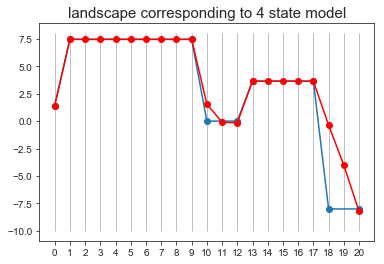

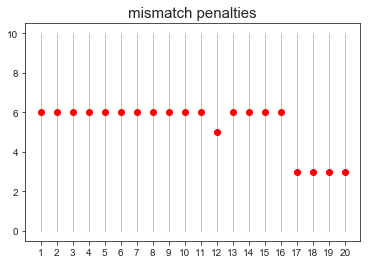

In [52]:
model_id = 'four_state_model_clv_constant_ei+four_state_model_on_constant_ei'
reload(model)
reload(clv)


parameters = np.zeros(10)
parameters[0] = 1.4
parameters[1] = 1.4
parameters[2] = 8.
parameters[3] = 6.045
parameters[4] = 3.637
parameters[5] = 6.#final_par_np[2:22]
parameters[6] = 3.
parameters[7] = -2.4
parameters[-2] = 1.8
parameters[-1] = 3.8

parameters_clv = 0
model_ID_clv, model_ID_on, _, parameters_on = model.combined_model(parameters,model_id)

epsilon, _ = model.unpack_parameters(parameters_on,model_ID_on)
epsilontemp = np.cumsum(np.append(epsilon[0], -epsilon[1:5]))
epsilontemp = np.append(epsilontemp[0],np.append([epsilontemp[0] + epsilon[5],epsilontemp[0] + epsilon[5]],epsilontemp[1:]))
epsilontemp = np.append(epsilontemp[0:5],np.append([epsilontemp[4] + epsilon[6],epsilontemp[4] + epsilon[6]],epsilontemp[5:]))

plt.plot([0,1,9,10,12,13,17,18,20],epsilontemp,marker='o')
plt.vlines(range(0,21),-10,8,linewidth=0.5,color='grey')
plt.xticks(range(0,21),range(0,21));
plt.title('landscape corresponding to 4 state model',fontsize=15)

landscape = np.zeros(21)
landscape[0] = 1.389248 #PAM Boyle, minus PAM Boyle :)
landscape[1:10] = np.ones(9)*7.44538973 #median height
landscape[10:13] = [1.547533, -0.105180, -0.153215] #well defined dip, from Boyle
landscape[13:18] = np.ones(5)*3.6374928 #median height
landscape[18:21] = [-0.361180,-4.009278,-8.223548] #well defined second dip, from Boyle

plt.plot(range(0,21),landscape,marker='o',color='red')

plt.figure()
plt.plot(range(1,21),epsilon[7:27],marker='o',color='red',linewidth=0.)
plt.vlines(range(1,21),0,10,linewidth=0.5,color='grey')
plt.xticks(range(1,21),range(1,21));
plt.title('mismatch penalties',fontsize=15)

Text(34,0.5,'mismatch 2')

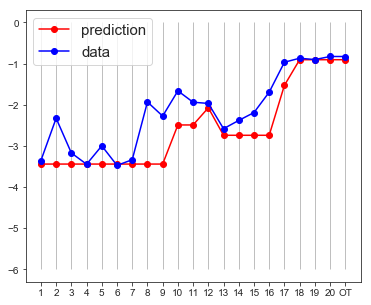

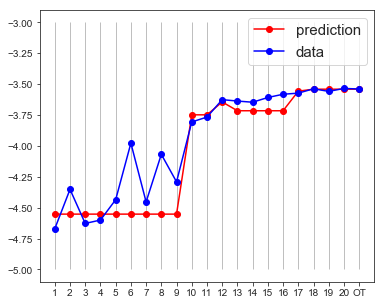

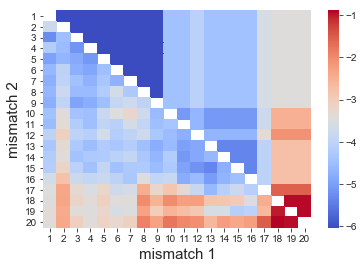

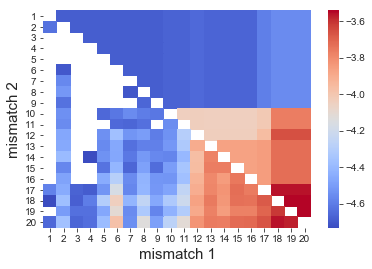

In [53]:
k = np.zeros(21)
k2 = np.zeros(21)
for i in range(1,21):
    mismatch_positions = [i]
    k[i-1],k2[i-1] = np.log10(clv.calc_clv_on(parameters,model_id,mismatch_positions))
k[-1],k2[-1] = np.log10(clv.calc_clv_on(parameters,model_id,[]))
    
plt.figure(figsize=[6,5])
plt.plot(range(1,22),k,marker='o',color='red')
plt.xticks(range(1,22),range(1,21)+['OT']);
plt.vlines(range(1,22),-6,0,linewidth=0.5,color='grey')
plt.plot(range(1,22),kclv,marker='o',color='b')
plt.legend(['prediction','data'],fontsize=15)

plt.figure(figsize=[6,5])
plt.plot(range(1,22),k2,marker='o',color='red')
plt.xticks(range(1,22),range(1,21)+['OT']);
plt.vlines(range(1,22),-5,-3,linewidth=0.5,color='grey')
plt.plot(range(1,22),kon,marker='o',color='b')
plt.legend(['prediction','data'],fontsize=15)

k_double = np.zeros([20,20])
k_double2 = np.zeros([20,20])
for i in range(1,20):
    for j in range(i+1,21):
        mismatch_positions = [i,j]
        k_double[i-1][j-1],k_double2[i-1][j-1] = np.log10(clv.calc_clv_on(parameters,model_id,mismatch_positions))
        
k_df = pd.DataFrame(k_double, index=range(1, 21), columns=range(1, 21))
k_on_df = pd.DataFrame(k_double2, index=range(1, 21), columns=range(1, 21))

k_df = k_df + k_double_df
k_on_df = k_on_df + k_double_on_df
for i in range(1,21):
    k_df[i].loc[i]=np.nan
    k_on_df[i].loc[i]=np.nan
    
plt.figure()
sns.heatmap(k_df, cmap='coolwarm', cbar=True)
plt.xlabel('mismatch 1', fontsize=15)
plt.ylabel('mismatch 2', fontsize=15)

plt.figure()
sns.heatmap(k_on_df, cmap='coolwarm', cbar=True)
plt.xlabel('mismatch 1', fontsize=15)
plt.ylabel('mismatch 2', fontsize=15)